In [123]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations

In [124]:
# os.listdir("data/")

In [330]:
# data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AAMLGQEDPPQHGLPR_3_6_FAS_MOUSE.csv")
data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_YLILNATQAESK_2_31_1433B_MOUSE.csv")
# data=pd.read_csv("data/_DTSFEQHVLLHTGGK_3_21_FAS_MOUSE.csv")
data.head()

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH
0,17,0.0475,0.018374,0.750428,0.731857,1.598472,1.681948,100,23
1,17,0.0476,0.018192,0.750428,0.731857,1.600347,1.681948,100,23
2,17,0.0477,0.018009,0.750428,0.731857,1.602222,1.681948,100,23
3,17,0.0478,0.017828,0.750428,0.731857,1.604097,1.681948,100,23
4,17,0.0479,0.017646,0.750428,0.731857,1.605973,1.681948,100,23


In [331]:
ph=1.5574E-4
ph

0.00015574

In [332]:
# data["const"]=data.NEH*data.pxt
# data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
# data["new_neh"]=data.const/data.new_pxt
# data=data.sort_values(by="RMSE",ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# # data["temp"]= (data.new_neh*data.new_pxt)/( (1-ph)*(1-ph-data.new_pxt) )
# # data["temp2"]=(data["exp_t_A1/A0"]-data["theo_A1/A0"])

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
# data.head(290)

In [333]:
data["const"]=data.NEH*data.pxt
data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
data["new_neh"]=data.const/data.new_pxt
data=data.sort_values(by=["RMSE"],ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
data.head(290)

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH,const,new_pxt,new_neh
1699,49,0.0198,0.005201,0.750428,0.731857,1.740536,1.681948,100,23,0.970199,-0.041840,-23.188470
1700,49,0.0199,0.005207,0.750428,0.731857,1.745638,1.681948,100,23,0.975099,-0.047101,-20.702407
1664,48,0.0202,0.005217,0.750428,0.731857,1.740328,1.681948,100,23,0.969599,-0.041196,-23.536506
1665,48,0.0203,0.005218,0.750428,0.731857,1.745330,1.681948,100,23,0.974399,-0.046349,-21.022991
1629,47,0.0207,0.005227,0.750428,0.731857,1.744204,1.681948,100,23,0.972899,-0.044739,-21.746242
...,...,...,...,...,...,...,...,...,...,...,...,...
990,32,0.0309,0.005933,0.750428,0.731857,1.771078,1.681948,100,23,0.988798,-0.061810,-15.997379
1079,34,0.0279,0.005937,0.750428,0.731857,1.726561,1.681948,100,23,0.948599,-0.018648,-50.867838
514,24,0.0403,0.005937,0.750428,0.731857,1.758567,1.681948,100,23,0.967203,-0.038623,-25.042100
1041,33,0.0300,0.005937,0.750428,0.731857,1.771368,1.681948,100,23,0.989999,-0.063099,-15.689673


In [334]:
# np.dot(data[["NEH","pxt"]][318],data[["new_pxt","new_neh"]][318])/(norm(data[["NEH","pxt"]][318])*norm(data[["new_pxt","new_neh"]][318]))

(560, 12)


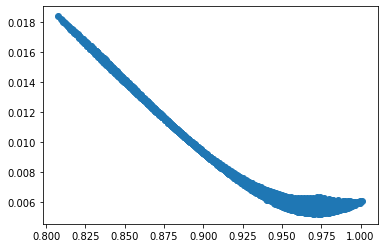

In [335]:
from matplotlib import pyplot as plt
plt.scatter(data.const,data.RMSE)
print(data[data.new_pxt<0].shape)

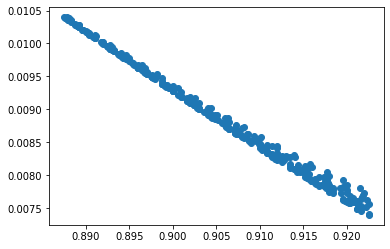

In [336]:
tempdata=data[data.RMSE<2*min(data.RMSE)]
tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
tempdata["pxt_dif"]=(abs((tempdata.pxt) - (tempdata.new_pxt))) #(abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2 
plt.scatter(tempdata.const,tempdata.RMSE)

In [337]:
tempdata.sort_values(by=["pxt_dif"]).head(25)

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH,const,new_pxt,new_neh,pxt_dif
1464,43,0.0212,0.008270,0.750428,0.731857,1.682065,1.681948,100,23,0.911599,0.021078,43.249169,0.000122
855,30,0.0301,0.009022,0.750428,0.731857,1.681745,1.681948,100,23,0.902999,0.030311,29.790738,0.000211
342,22,0.0406,0.009901,0.750428,0.731857,1.681726,1.681948,100,23,0.893202,0.040830,21.876354,0.000229
186,20,0.0445,0.010194,0.750428,0.731857,1.682179,1.681948,100,23,0.890004,0.044264,20.106671,0.000236
552,25,0.0359,0.009512,0.750428,0.731857,1.681644,1.681948,100,23,0.897501,0.036215,24.782879,0.000315
414,23,0.0389,0.009765,0.750428,0.731857,1.681639,1.681948,100,23,0.894702,0.039220,22.812571,0.000320
1383,41,0.0222,0.008390,0.750428,0.731857,1.681586,1.681948,100,23,0.910199,0.022581,40.308310,0.000381
740,28,0.0322,0.009148,0.750428,0.731857,1.682320,1.681948,100,23,0.901599,0.031814,28.339555,0.000386
798,29,0.0311,0.009119,0.750428,0.731857,1.681571,1.681948,100,23,0.901899,0.031493,28.638326,0.000393
1424,42,0.0217,0.008289,0.750428,0.731857,1.682337,1.681948,100,23,0.911399,0.021293,42.803673,0.000407


In [338]:
(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

1464    43.249169
855     29.790738
342     21.876354
186     20.106671
552     24.782879
Name: new_neh, dtype: float64

In [339]:
np.median(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

24.7828794086218

In [221]:
# plt.scatter(range(0,6),[3.94E+06,6.30E+06,8.23E+06,6.51E+06,3.99E+06,3.33E+06])

In [390]:
# plt.scatter(range(0,6),[4.77E+07,9.92E+07,1.11E+08,9.49E+07,5.45E+07,2.81E+07])